IA & Data science (3i026) -- 2018-2019
--------
*&copy; Equipe pédagogique: Manon Ansart, Vincent Guigue, Marie-Jeanne Lesot, Christophe Marsala, Olivier Schwander.*

# TD-TME08: algorithme des k-moyennes

L'objectif de ce TP est d'implémenter un nouvel algorithme d'apprentissage non-supervisé, l'algorithme des K-moyennes (cours 9).

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

GUERASSIMOV Alexandre - QIAN Christian

<font color="RED" size="+1">**[Q]**</font> **Renommer ce fichier ipython**

Compléter le nom de ce notebook en rajoutant les noms des membres du binômes séparés par un tiret.

## Préparation

Décompresser l'archive, elle crée le répertoire "tp8" qui contient un fichier ipython à ouvrir (ce fichier-ci) et un sous-répertoire "data" contenant les bases d'apprentissage utilisées dans ce TP.

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import itertools
import matplotlib.cm as cm
%matplotlib inline  

## Travail à réaliser
Le travail à faire se décompose en 2 phases :
- dans un premier temps, le travail porte sur la base d'apprentissage <code>base-2D.csv</code> qui contient des exemples décrits dans $R^2$. Ainsi, il est plus aisé de visualiser les résultats des fonctions à écrire ;
- dans un second temps, les fonctions écrites dans la phase précédente sont à utiliser avec la base d'apprentissage "base-Paris.csv".

**Attention**: vos fonctions doivent **dès leur création** pouvoir s'appliquer **quelle que soit la dimension** des exemples traités.


### Important :
Dans la suite de ce TP, on appelle:

- "base d'apprentissage" le dataframe contenant l'ensemble des exemples d'apprentissage chargés par la commande précédente
- "base d'exemples" : un dataframe contenant un ensemble d'exemples (remarque: la base d'apprentissage est le plus grand ensemble d'exemples possible)

**Rappel**: avec un dataframe, il est facile d'accéder à tous les éléments d'une colonne, par exemple si <code>DF</code> est un dataframe, '<code>DF['X']</code> permet de récupérer une <code>Series</code> contenant toutes les lignes de la colonne de nom 'X'.
On peut accéder à une ligne (ou un ensemble de ligne) très facilement:
- <code>DF.iloc[0]</code> permet de récupérer la ligne d'indice 0 sous la forme d'une "series"
- <code>DF.iloc[0:1]</code> permet de récupérer la ligne d'indice 0 sous la forme d'un dataframe (cettte instruction réalise un "slicing")
- <code>DF.iloc[0:5]</code> permet de récupérer les lignes d'indice de 0 à 4

etc.

### Données d'expérimentation

Commencer par charger le fichier <code>base_2D.csv</code> qui permettra d'expérimenter vos fonctions. Dans ce qui suit, on note <code>data_2D</code> le dataframe qui contient les données de ce fichiers.


In [4]:
data_2D = pd.read_csv("base-2D.csv")
data_2D.head()

,X,Y
0,0.0,4.0
1,1.0,3.5
2,1.0,1.0
3,2.0,1.0
4,2.0,2.0


## Partie 1 : fonctions utiles (et retour vers la séance dernière)

<font size="+1" color="RED">**[Q]**</font> (Ré)écrire la fonction <code>normalisation()</code> du TD-TME07: cette fonction doit prendre en argument un <code>DataFrame DF</code> et rendre **le dataframe** obtenu en normalisant chaque colonne de <code>DF</code> par la méthode vue en cours 8.

In [5]:
def normalisation(df):
    return (df - df.min(axis=0)) / (df.max(axis=0) - df.min(axis=0))

---> type de DataFnorm: <class 'pandas.core.frame.DataFrame'>


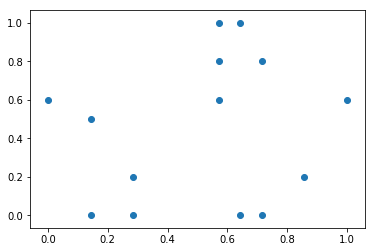

In [6]:
# Affichage des points après normalisation:

DataFnorm = normalisation(data_2D)
print("---> type de DataFnorm:",type(DataFnorm))

plt.scatter(DataFnorm['X'],DataFnorm['Y'])

<font size="+1" color="RED">**[Q]**</font> Réécrire la fonction <code>dist_vect()</code> qui calcule la distance euclidienne entre deux <code>Series</code>.

In [7]:
def dist_vect(e1, e2):
    return np.sqrt(((e2 - e1)**2).sum())

In [8]:
assert dist_vect(DataFnorm.iloc[0],DataFnorm.iloc[7]) == 0.6975174637562116

### Calcul de centroides

<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <code>centroide()</code> qui, étant donné un DataFrame représentant plusieurs exemples rend le centroide. Cette fonction doit rendre un DataFrame.

In [9]:
def centroide(df):
    #if df.size() == 0:
        #return df
    return (df.sum() / df.shape[0]).to_frame().T

In [10]:
centroide(DataFnorm)

,X,Y
0,0.510204,0.45


## Partie 2: implémentation des k-moyennes

### Inertie d'un cluster
<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <code>inertie_cluster</code> qui, étant donné un DataFrame contenant un ensemble d'exemples, rend la valeur de l'inertie de cet ensemble telle qu'elle a été définie dans le cours.

In [11]:
def inertie_cluster(df):
    c = centroide(df)
    res = 0
    for e in df.values:
        res += (dist_vect(e, c)**2)
    return res.sum()

In [12]:
print("inertie :",inertie_cluster(DataFnorm)) #2.975991253644316

inertie : 2.975991253644315


Dans ce qui suit, on appelle "ensemble de centroides" un dataframe contenant $K$ vecteurs de dimensions $p$.

<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <code>initialisation()</code> qui étant donné un entier $K>1$ et une base d'apprentissage (sous la forme d'un DataFrame) de $n$ exemples rend un dataframe contenant $K$ exemples tirés aléatoirement dans la base.
On fait l'hypothèse que $K\leq n$.

*Remarque*: étudier les fonctions de la librairie random de Python...


In [13]:
def initialisation(K, df):
    return df.sample(n=K, axis=0)

In [14]:
# Par exemple (mais vous ne devriez pas pouvoir retrouver exactement les mêmes !)
Centroides_testb = initialisation(3,DataFnorm)
Centroides_testb

,X,Y
7,0.571429,1.0
13,1.000000,0.6
10,0.714286,0.0


In [15]:
#pour vérifier les résultats ultérieurs
data = [[0.642857, 0.0], [0.142857,0.5], [0.571429,1.0]]
Centroides_test = pd.DataFrame(data, columns = ['X', 'Y'])
Centroides_test

,X,Y
0,0.642857,0.0
1,0.142857,0.5
2,0.571429,1.0


En utilisant l'option <code>"color='blue'"</code> ou <code>"color='red'"</code> de la fonction <code>scatter()<code>, on peut réaliser l'affichage de la base d'apprentissage (en bleu) et des centroides initiaux (en rouge).

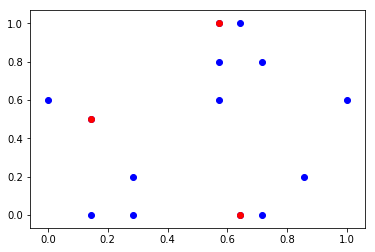

In [16]:
plt.scatter(DataFnorm['X'],DataFnorm['Y'],color='blue')
plt.scatter(Centroides_test['X'],Centroides_test['Y'],color='red')

<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <code>plus_proche()</code> qui, étant donné un exemple et un dataframe contenant un ensemble de centroides, rend l'indice (dans le DataFrame) du centroide dont l'exemple est le plus proche.
En cas d'égalité de distance, le centroide de plus petit indice est choisi.

In [1]:
def plus_proche(e, df):
    #return df.apply(dist_vect, args=(e, )).to_frame().T#.idxmin(axis=0)
    res = []
    #for i in df.values:
    #    res.append(dist_vect(e, i))
    df.apply(lambda x : res.append(dist_vect(x,e)), axis=1)
    return res.index(min(res))
#plus_proche(DataFnorm.iloc[0],Centroides_test)

In [18]:
for i in range(0,len(DataFnorm)):
    pproche = plus_proche(DataFnorm.iloc[i],Centroides_test)
    print("Exemple ",i,": (",DataFnorm.iloc[i]['X'],",", DataFnorm.iloc[i]['Y'], ")",\
          "est plus proche du centroide",pproche, ": (",Centroides_test.iloc[pproche]['X'],", ", \
          Centroides_test.iloc[pproche]['Y'],")")

Exemple  0 : ( 0.0 , 0.6 ) est plus proche du centroide 1 : ( 0.142857 ,  0.5 )
Exemple  1 : ( 0.14285714285714285 , 0.5 ) est plus proche du centroide 1 : ( 0.142857 ,  0.5 )
Exemple  2 : ( 0.14285714285714285 , 0.0 ) est plus proche du centroide 0 : ( 0.642857 ,  0.0 )
Exemple  3 : ( 0.2857142857142857 , 0.0 ) est plus proche du centroide 0 : ( 0.642857 ,  0.0 )
Exemple  4 : ( 0.2857142857142857 , 0.2 ) est plus proche du centroide 1 : ( 0.142857 ,  0.5 )
Exemple  5 : ( 0.5714285714285714 , 0.6 ) est plus proche du centroide 2 : ( 0.571429 ,  1.0 )
Exemple  6 : ( 0.5714285714285714 , 0.8 ) est plus proche du centroide 2 : ( 0.571429 ,  1.0 )
Exemple  7 : ( 0.5714285714285714 , 1.0 ) est plus proche du centroide 2 : ( 0.571429 ,  1.0 )
Exemple  8 : ( 0.6428571428571429 , 0.0 ) est plus proche du centroide 0 : ( 0.642857 ,  0.0 )
Exemple  9 : ( 0.6428571428571429 , 1.0 ) est plus proche du centroide 2 : ( 0.571429 ,  1.0 )
Exemple  10 : ( 0.7142857142857143 , 0.0 ) est plus proche du c

### Matrice d'affectation

Etant donné une base d'apprentissage, on peut représenter une partition de cette base en K clusters à l'aide d'une matrice U contenant n lignes (une par exemple) et K colonnes (une par cluster) telle que 
- U[i,j] = 1 si l'exemple i appartient au cluster j
- U[i,j] = 0 si l'exemple i n'appartient pas au cluster j
- un exemple appartient à un et un seul cluster
- un cluster contient au moins un exemple

On appelle **matrice d'affectation** une telle matrice U.


<font size="+1" color="RED">**[Q]**</font> Donner une expression mathématique (pas du Python) des 2 dernières contraintes que vérifie une matrice d'affectation.

Soient J l'ensemble des clusters et I l'ensemble des exemples

Un exemple appartient à un et un seul cluster:
$$
\forall i \in j, j\in J, i \in I, \not\exists j' \in J, i \in j', j' \ne j   
$$

Un cluster contient au moins un exemple:
$$
\forall j \in J, \exists i \in j, i \in I, i \ne \emptyset
$$

### Implémentation en Python
Nous utilisons un dictionnaire pour représenter d'une matrice d'affectation: 
- les clés de ce dictionnaire correspondent aux $K$ indices des clusters
- les valeurs correspondent à des listes d'indices d'exemples (leur indice dans la base d'apprentissage)

Dans tout ce qui suit, une "matrice d'affectation" sera un tel dictionnaire.


<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <code>affecte_cluster()</code> qui, étant donné une base d'apprentissage et un ensemble de centroïdes, rend la matrice d'affectation des exemples de la base aux clusters représentés par chaque centroïde.

In [19]:
def affecte_cluster(train, c):
    dico = dict()
    for i in range(len(c.index)):
        dico[i] = []
    for t in range(len(train.index)):
        pp = plus_proche(train.iloc[t],c)
        dico[pp].append(t)
    return dico

In [20]:
DictAffect = affecte_cluster(DataFnorm, Centroides_test)
DictAffect

{0: [2, 3, 8, 10, 12], 1: [0, 1, 4], 2: [5, 6, 7, 9, 11, 13]}

### Ensemble des centroides
Grâce à la matrice d'affectation, on peut maintenant trouver les nouveaux centroides. Ceux-ci sont déterminés en prenant les moyennes des ensembles des exemples qui sont affectés au même cluster.

<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <code>nouveaux_centroides()</code> qui, étant donné une base d'apprentissage et une matrice d'affectation, rend l'ensemble des nouveaux centroides obtenus.

In [21]:
def nouveaux_centroides(train, m):
    l = []
    for k in m.keys():
        cd = train.iloc[m[k], :]
        moys = cd.mean()
        l.append(moys)
        #x = cd['X'].mean()
        #y = cd['Y'].mean()
        #l.append([x,y])
    return pd.DataFrame(l, columns = list(train))

In [22]:
nouveaux_centroides(DataFnorm, DictAffect)

,X,Y
0,0.528571,0.040000
1,0.142857,0.433333
2,0.678571,0.800000


### Inertie globale d'une partition

<font size="+1" color="RED">**[Q]**</font> En utilisant la fonction <code>inertie_cluster()</code>, écrire la fonction <code>inertie_globale()</code> qui, étant donné une base d'apprentissage et une matrice d'affectation, rend la valeur de l'inertie globale du partitionnement correspondant.


In [23]:
def inertie_globale(train, m):
    res = 0
    for k in m.keys():
        cd = train.iloc[m[k], :]
        res += inertie_cluster(cd)
    return res

In [24]:
inertie_globale(DataFnorm,DictAffect)

0.8230544217687075

### Algorithme des K-moyennes

<font size="+1" color="RED">**[Q]**</font> En utilisant les fonctions précédentes, implémenter l'algorithme des K-moyennes.
Pour cela, écrire une fonction <code>kmoyennes()</code> qui prend en argument un entier $K>1$, une base d'apprentissage, ainsi que deux nombres: un réel *epsilon*$>0$ et un entier *iter_max*$>1$, et qui rend un ensemble de centroides et une matrice d'affectation.

Le réel *epsilon* servira de critère de convergence, et l'entier *iter_max* sera utilisé pour fixer un nombre d'itérations maximale servant à arrêter le calcul.

In [25]:
def kmoyennes(K, train, e, iter_max):
    p = initialisation(K, train)
    m = affecte_cluster(train, p)
    p = nouveaux_centroides(train, m)
    j = inertie_globale(train,m)
    for i in range(iter_max):
        p2 = initialisation(K, train)
        m2 = affecte_cluster(train, p2)
        p2 = nouveaux_centroides(train, m2)
        j2 = inertie_globale(train, m2)
        dif = np.abs(j2 - j)
        print("iteration ", i+1 ," Inertie : ", j2, " Difference:", dif)
        if dif < e:
            break
        p = p2
        m = m2
        j = j2
    return p2, m2

In [26]:
les_centres, l_affectation = kmoyennes(2, DataFnorm, 0.05, 100)

print("Affichage des centres: ",les_centres)
print("Affichage des affectations: ",l_affectation)

iteration  1  Inertie :  1.600110544217687  Difference: 0.018723275024295383
Affichage des centres:            X         Y
0  0.616071  0.700000
1  0.369048  0.116667
Affichage des affectations:  {0: [0, 5, 6, 7, 9, 11, 12, 13], 1: [1, 2, 3, 4, 8, 10]}


In [27]:
les_centres, l_affectation = kmoyennes(3, DataFnorm, 0.05, 100)

print("Affichage des centres: ",les_centres)
print("Affichage des affectations: ",l_affectation)

iteration  1  Inertie :  1.7269183673469388  Difference: 0.38418027210884365
iteration  2  Inertie :  1.1504130223517977  Difference: 0.5765053449951412
iteration  3  Inertie :  0.7759183673469388  Difference: 0.3744946550048589
iteration  4  Inertie :  1.7068367346938775  Difference: 0.9309183673469388
iteration  5  Inertie :  0.9939455782312925  Difference: 0.712891156462585
iteration  6  Inertie :  1.3987414965986396  Difference: 0.4047959183673471
iteration  7  Inertie :  0.7812585034013606  Difference: 0.617482993197279
iteration  8  Inertie :  0.7812585034013606  Difference: 0.0
Affichage des centres:            X         Y
0  0.678571  0.800000
1  0.071429  0.550000
2  0.488095  0.066667
Affichage des affectations:  {0: [5, 6, 7, 9, 11, 13], 1: [0, 1], 2: [2, 3, 4, 8, 10, 12]}


On peut réaliser un affichage couleur des centroïdes trouvés:

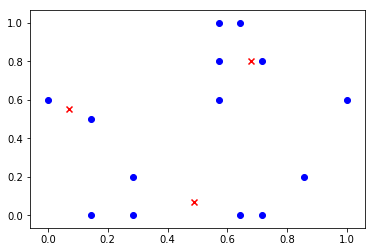

In [28]:
plt.scatter(DataFnorm['X'],DataFnorm['Y'],color='b')
plt.scatter(les_centres['X'],les_centres['Y'],color='r',marker='x')

<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <code>affiche_resultat()</code> qui permet d'afficher le résultat de l'algorithme en utilisant des couleurs différentes pour les clusters trouvés (pour faire simple, on peut ne considèrer que le cas où K vaut 3).

*Remarque*: La librairie matplotlib permet de manipuler aisément des couleurs:
http://matplotlib.org/api/cm_api.html

In [29]:
def affiche_resultat(df, c, m):
    colors = cm.rainbow(np.linspace(0, 1, len(m.keys())+1))
    #colors = itertools.cycle(["b", "c", "g"])
    for i in m.keys():
        x = []
        y = []
        tab = m[i]
        for e in tab:
            stock = df.iloc[e]
            x.append(stock['X'])
            y.append(stock['Y'])
        plt.scatter(x, y, color=colors[i])
    plt.scatter(c['X'],c['Y'],color=colors[len(m.keys())],marker='x')
    plt.show()

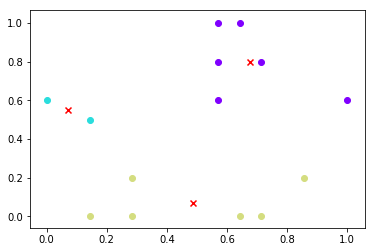

In [30]:
affiche_resultat(DataFnorm,les_centres,l_affectation)

### Expérimentations

<font size="+1" color="RED">**[Q]**</font> Expérimenter l'algorithme des k-moyennes sur les données. Etudier l'impact du choix de $K$ sur l'inertie globale finale. Faire de même en relançant plusieurs fois l'algorithme avec la même valeur de $K$, en modifiant la valeur de epsilon ou de max_iter, etc.

iteration  1  Inertie :  1.8025668934240362  Difference: 0.0


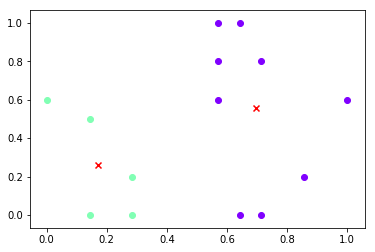

In [31]:
les_centres, l_affectation = kmoyennes(2, DataFnorm, 0.05, 100)
affiche_resultat(DataFnorm,les_centres,l_affectation)

iteration  1  Inertie :  0.6958061224489795  Difference: 0.061050048590864936
iteration  2  Inertie :  0.3761904761904762  Difference: 0.31961564625850336
iteration  3  Inertie :  0.34448299319727893  Difference: 0.031707482993197256


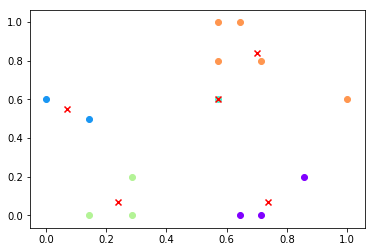

In [32]:
les_centres, l_affectation = kmoyennes(5, DataFnorm, 0.05, 100)
affiche_resultat(DataFnorm,les_centres,l_affectation)

iteration  1  Inertie :  0.39545918367346944  Difference: 0.2729081632653062
iteration  2  Inertie :  0.1082312925170068  Difference: 0.28722789115646263
iteration  3  Inertie :  0.07078231292517008  Difference: 0.037448979591836726


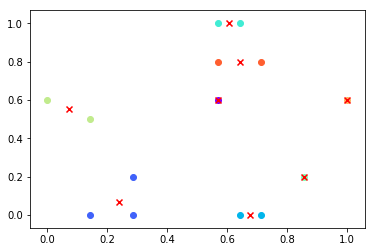

In [33]:
les_centres, l_affectation = kmoyennes(8, DataFnorm, 0.05, 100)
affiche_resultat(DataFnorm,les_centres,l_affectation)

iteration  1  Inertie :  0.13965986394557825  Difference: 0.07170068027210887
iteration  2  Inertie :  0.11357142857142857  Difference: 0.026088435374149677


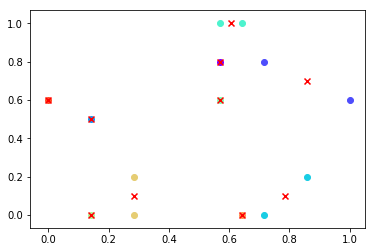

In [34]:
les_centres, l_affectation = kmoyennes(10, DataFnorm, 0.05, 100)
affiche_resultat(DataFnorm,les_centres,l_affectation)

Ainsi, augmenter la valeur de K réduit fortement l'intertie globale finale, mais les groupes s'en retrouvent décousues ; tandis que la diminuer permet de former des groupes cohérents, mais avec une inertie globale finale élevée.

iteration  1  Inertie :  0.958438775510204  Difference: 0.026045189504373067
iteration  2  Inertie :  0.8127244897959183  Difference: 0.14571428571428569
iteration  3  Inertie :  0.7759183673469388  Difference: 0.03680612244897952
iteration  4  Inertie :  0.7199251700680271  Difference: 0.05599319727891161
iteration  5  Inertie :  1.0079037900874634  Difference: 0.2879786200194363
iteration  6  Inertie :  1.221598639455782  Difference: 0.21369484936831862
iteration  7  Inertie :  1.522984693877551  Difference: 0.301386054421769
iteration  8  Inertie :  1.2732099125364433  Difference: 0.24977478134110775
iteration  9  Inertie :  1.2269727891156461  Difference: 0.04623712342079722
iteration  10  Inertie :  1.0873809523809523  Difference: 0.13959183673469377
iteration  11  Inertie :  1.1504130223517977  Difference: 0.06303206997084532
iteration  12  Inertie :  0.958438775510204  Difference: 0.1919742468415937
iteration  13  Inertie :  1.495419501133787  Difference: 0.536980725623583
itera

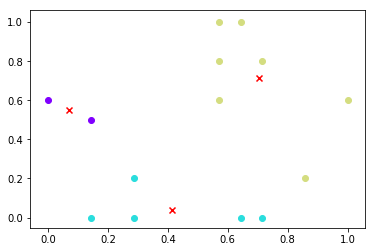

In [35]:
les_centres, l_affectation = kmoyennes(3, DataFnorm, 0.00001, 100)
affiche_resultat(DataFnorm,les_centres,l_affectation)

iteration  1  Inertie :  0.7812585034013606  Difference: 0.05670748299319728


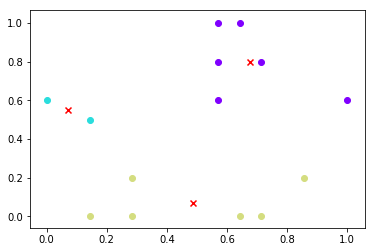

In [36]:
les_centres, l_affectation = kmoyennes(3, DataFnorm, 0.9, 100)
affiche_resultat(DataFnorm,les_centres,l_affectation)

Après multiples essais, on s'aperçoit qu'entre un épsilon elevé est un epsilon faible, il n'y a pas une grande diffrérence entre les valeurs finales d'interties - même si en général, avec un epsilon elevé, l'intertie est légèrement plus élevée quand même, mais pas toujours. En revanche, avec un epsilon faible, on remarque le nombre d'itérations nécessaires avant d'obtenir les résultats finaux est beaucoup plus grand qu'avec un epsilon elevé.

iteration  1  Inertie :  1.2170116618075804  Difference: 0.16116326530612257
iteration  2  Inertie :  0.8127244897959183  Difference: 0.4042871720116621
iteration  3  Inertie :  0.958438775510204  Difference: 0.14571428571428569
iteration  4  Inertie :  1.0401919339164236  Difference: 0.08175315840621966
iteration  5  Inertie :  1.0079037900874634  Difference: 0.03228814382896017


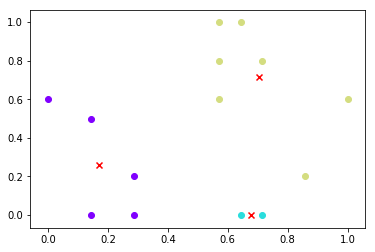

In [37]:
les_centres, l_affectation = kmoyennes(3, DataFnorm, 0.05, 200)
affiche_resultat(DataFnorm,les_centres,l_affectation)

iteration  1  Inertie :  0.7812585034013606  Difference: 0.4755272108843538


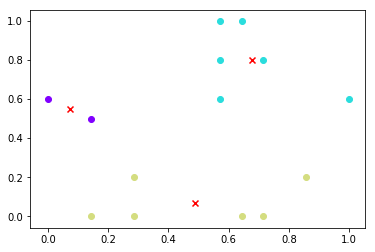

In [38]:
les_centres, l_affectation = kmoyennes(3, DataFnorm, 0.05, 1)
affiche_resultat(DataFnorm,les_centres,l_affectation)

Augmenter le nombre d'itérations maximum ne change rien vu qu'on dépasse rarement les 10 itérations avec les valeurs de bases utilisées pour epsilon et K. En revanche, en l'abaissant, on remarque que les groupes qui se forment ne sont pas toujours les plus optimaux mais une certaine cohérence demeure : il arrive par exemple qu'un point est affecté à un groupe dont le centroide est assez éloigné, malgré la présence d'un centroide plus proche ; mais sans pour autant trouver de points entourés par des points d'autres groupes. L'inertie globale finale se retrouve généralement plus elevée avec un nombre d'itérations bas qu'avec un grand nombre d'itérations.

## Application à des données réelles

- Appliquer l'algorithme aux données concernant les déchets de la ville de Paris (qui sont fournies dans le répertoire data)
- Trouver des bases d'apprentissage intéressantes sur http://opendata.paris.fr/


Dans les 2 cas, étudier la base et les clusters qui peuvent être mis en évidence. En particulier, regarder la variation de l'inertie globale des clusters obtenus en fonction de la valeur de $K$ choisie.


**Attention**: il faudra certainement préparer cette base afin de pouvoir appliquer l'algorithme de clustering: en particulier, certaines colonnes (Granularité, Total...) ne sont pas à utilisables dans le calcul des distances, il faudra donc les éliminer. Il faut aussi prévoir de conserver le nom de l'arrondissement afin de pouvoir à la fin analyser le résultat du clustering.

In [39]:
#utilisation de la même base qu'au TME7
url = "https://opendata.paris.fr/explore/dataset/tonnages_des_dechets_bacs_jaunes/download/?format=csv&timezone=Europe/Berlin&use_labels_for_header=true"
data_Paris = pd.read_csv(url, sep=";")
data_Paris = data_Paris.drop(13)
data_Paris

,Granularité,janv-11,févr-11,mars-11,avr-11,mai-11,juin-11,juil-11,août-11,sept-11,oct-11,nov-11,déc-11,Total arrondissement 2011
0,75007,"288,1","249,1","303,7","255,8","287,8","288,4","249,6","185,6","281,3","284,3","296,4","301,1",NaN
1,75013,"596,5","540,2","618,5","558,6","595,9","581,7","539,2","490,5","597,8","575,7","580,5","601,4",NaN
2,75014,464,"404,9","465,3","420,2","405,3",446,"412,9","348,7","449,3","446,3","453,1","484,3",NaN
3,75015,"903,1","801,4","937,5","835,5","876,8","888,6","628,8","674,8","913,3","878,7","895,7","935,8",NaN
4,75017,"451,1","412,4","491,6","422,7","363,6","446,4","409,5","332,3","416,4","451,5","475,1","513,5",NaN
5,75018,427,"394,3","455,2","419,9","458,3","456,6",418,"361,8","464,6","453,4","478,5","470,9",NaN
6,75019,"323,4","287,3","350,3","317,8","336,9","340,7","311,6",281,"345,6","335,6",367,"354,5",NaN
7,75002,153,"125,8","136,6","126,6","133,2","127,6","126,7","114,3","144,3","145,1","129,5","129,8",NaN
8,75004,"116,3","115,7","133,4",115,"123,2","120,5","114,5","97,6","130,5",123,"124,3","133,7",NaN
9,75008,"252,6","246,7","252,9","232,5","199,4","236,4","175,4","189,4","266,6","230,3","257,7","224,4",NaN


In [40]:
arrondissements = data_Paris.iloc[:, :1]
data_Paris = data_Paris.iloc[:, 1:-1]
data_Paris = data_Paris.stack().str.replace(' ','').unstack()
data_Paris = data_Paris.stack().str.replace(',','.').unstack()
data_Paris = data_Paris.astype(float)

In [41]:
arrondissements

,Granularité
0,75007
1,75013
2,75014
3,75015
4,75017
5,75018
6,75019
7,75002
8,75004
9,75008


In [42]:
data_Paris

,janv-11,févr-11,mars-11,avr-11,mai-11,juin-11,juil-11,août-11,sept-11,oct-11,nov-11,déc-11
0,288.1,249.1,303.7,255.8,287.8,288.4,249.6,185.6,281.3,284.3,296.4,301.1
1,596.5,540.2,618.5,558.6,595.9,581.7,539.2,490.5,597.8,575.7,580.5,601.4
2,464.0,404.9,465.3,420.2,405.3,446.0,412.9,348.7,449.3,446.3,453.1,484.3
3,903.1,801.4,937.5,835.5,876.8,888.6,628.8,674.8,913.3,878.7,895.7,935.8
4,451.1,412.4,491.6,422.7,363.6,446.4,409.5,332.3,416.4,451.5,475.1,513.5
5,427.0,394.3,455.2,419.9,458.3,456.6,418.0,361.8,464.6,453.4,478.5,470.9
6,323.4,287.3,350.3,317.8,336.9,340.7,311.6,281.0,345.6,335.6,367.0,354.5
7,153.0,125.8,136.6,126.6,133.2,127.6,126.7,114.3,144.3,145.1,129.5,129.8
8,116.3,115.7,133.4,115.0,123.2,120.5,114.5,97.6,130.5,123.0,124.3,133.7
9,252.6,246.7,252.9,232.5,199.4,236.4,175.4,189.4,266.6,230.3,257.7,224.4


In [43]:
normParis = normalisation(data_Paris)
normParis

,janv-11,févr-11,mars-11,avr-11,mai-11,juin-11,juil-11,août-11,sept-11,oct-11,nov-11,déc-11
0,0.257067,0.254656,0.268383,0.252964,0.266409,0.265001,0.335786,0.208926,0.245643,0.259776,0.277865,0.259134
1,0.629621,0.647503,0.631767,0.643170,0.650143,0.624173,0.843055,0.701973,0.623418,0.622665,0.620195,0.609665
2,0.469558,0.464912,0.454923,0.464820,0.412754,0.457997,0.621825,0.472671,0.446169,0.461519,0.466683,0.472978
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,0.453974,0.475034,0.485282,0.468041,0.360817,0.458486,0.615870,0.446151,0.406899,0.467995,0.493192,0.507062
5,0.424861,0.450607,0.443264,0.464433,0.478764,0.470977,0.630758,0.493855,0.464431,0.470361,0.497289,0.457336
6,0.299710,0.306208,0.322175,0.332861,0.327563,0.329047,0.444386,0.363195,0.322392,0.323661,0.362935,0.321466
7,0.093863,0.088259,0.075493,0.086469,0.073857,0.068087,0.120511,0.093629,0.082120,0.086426,0.076756,0.059181
8,0.049529,0.074629,0.071800,0.071521,0.061402,0.059393,0.099142,0.066624,0.065648,0.058904,0.070490,0.063733
9,0.214182,0.251417,0.209743,0.222938,0.156308,0.201323,0.205815,0.215071,0.228097,0.192528,0.231233,0.169604


In [44]:
les_centres, l_affectation = kmoyennes(3, DataFnorm, 0.05, 100)
print(les_centres)
print(l_affectation)

iteration  1  Inertie :  1.2567857142857144  Difference: 0.5368605442176873
iteration  2  Inertie :  1.0558483965014576  Difference: 0.20093731778425683
iteration  3  Inertie :  1.1395238095238094  Difference: 0.08367541302235182
iteration  4  Inertie :  0.8127244897959183  Difference: 0.3267993197278911
iteration  5  Inertie :  0.7812585034013606  Difference: 0.031465986394557666
          X         Y
0  0.678571  0.800000
1  0.488095  0.066667
2  0.071429  0.550000
{0: [5, 6, 7, 9, 11, 13], 1: [2, 3, 4, 8, 10, 12], 2: [0, 1]}


In [45]:
les_centres, l_affectation = kmoyennes(5, DataFnorm, 0.05, 100)

iteration  1  Inertie :  0.2765578231292517  Difference: 0.28776190476190466
iteration  2  Inertie :  0.3531632653061225  Difference: 0.07660544217687082
iteration  3  Inertie :  0.5366938775510204  Difference: 0.18353061224489786
iteration  4  Inertie :  0.509812925170068  Difference: 0.02688095238095234


In [46]:
l_affectation

{0: [8, 10, 12, 13], 1: [5, 6], 2: [2, 3], 3: [7, 9, 11], 4: [0, 1, 4]}

In [47]:
les_centres, l_affectation = kmoyennes(13, DataFnorm, 0.05, 100)

iteration  1  Inertie :  0.010204081632653069  Difference: 0.007653061224489806


In [48]:
l_affectation

{0: [3],
 1: [5],
 2: [7],
 3: [13],
 4: [2],
 5: [12],
 6: [0],
 7: [6, 11],
 8: [1],
 9: [8],
 10: [4],
 11: [10],
 12: [9]}

In [49]:
les_centres, l_affectation = kmoyennes(4, DataFnorm, 0.05, 100)

iteration  1  Inertie :  1.224421768707483  Difference: 0.3364852607709752
iteration  2  Inertie :  0.651047619047619  Difference: 0.573374149659864
iteration  3  Inertie :  0.5922891156462585  Difference: 0.05875850340136046
iteration  4  Inertie :  0.8014387755102041  Difference: 0.20914965986394563
iteration  5  Inertie :  0.7141428571428571  Difference: 0.08729591836734707
iteration  6  Inertie :  0.5902244897959184  Difference: 0.12391836734693873
iteration  7  Inertie :  1.212091836734694  Difference: 0.6218673469387757
iteration  8  Inertie :  0.9585034013605441  Difference: 0.2535884353741499
iteration  9  Inertie :  0.9772210884353741  Difference: 0.018717687074830014


In [50]:
l_affectation

{0: [7, 9], 1: [0, 1, 5, 12], 2: [6, 11, 13], 3: [2, 3, 4, 8, 10]}

Ainsi, sans surprise, c'est avec K=13 (=nombre d'exemples) que l'inertie est la plus basse, mais les groupes formés ne sont donc pas très intéressants. Avec K=5, on arrive à avoir des groupes équilibrés avec une inertie assez basse. De manière générale, plus K est bas, plus l'inertie est élevée avec ces données.

## Questions de cours (à faire chez vous, sur papier)

Pour vous entraîner sans machine...

<font size="+1" color="RED">**[Q]**</font> On considère un ensemble fini $U$ d'éléments. 
- donner la fonction caractéristique de $U$
- donner la fonction caractéristique de l'ensemble vide
- soit $E$ et $F$ deux sous-ensembles de $U$ définis par leurs fonctions caractéristiques $\chi_E$ et $\chi_F$. En déduire les fonctions caractéristiques de $E\cup F$, de $E\cap F$ et de $E^{c}$. *(indice: penser au min et au max)*

<font size="+1" color="RED">**[Q]**</font> Rappeler la définition d'une partition $P$ d'un ensemble $X$ en $K$ sous-ensembles. 

<font size="+1" color="RED">**[Q]**</font> Appliquer, à la main, l'algorithme des K-moyennes sur les données fournies sur le transparent 10 du cours 8 en utilisant d'abord $K=2$, puis $K=3$. Dans chacun des cas, réaliser au maximum 10 itérations de l'algorithme ($t_{max}=10$).
Comparer les résultats obtenus.


---